## I. IMPORTING LIBRARIES

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import time

In [2]:
dataset = pd.read_csv('cleaned_data.csv', on_bad_lines='skip')

## II. DATA PREPROCESSING

In [3]:
response = dataset['enrolled']
dataset = dataset.drop(columns='enrolled')

In [4]:
from sklearn.model_selection import train_test_split

In [5]:
X_train, X_test, y_train, y_test = train_test_split(dataset, response, test_size=0.2, random_state=42)

In [6]:
train_identifier = X_train['user']
X_train = X_train.drop(columns='user')
test_identifier = X_test['user']
X_test = X_test.drop(columns='user')

In [7]:
from sklearn.preprocessing import StandardScaler

In [8]:
sc_X = StandardScaler()
X_train2 = pd.DataFrame(sc_X.fit_transform(X_train))
X_test2 = pd.DataFrame(sc_X.transform(X_test))
X_train2.columns = X_train.columns.values
X_test2.columns = X_test.columns.values
X_train2.index = X_train.index.values
X_test2.index = X_test.index.values
X_train = X_train2
X_test = X_test2

In [9]:
X_train

,dayofweek,hour,age,numscreens,minigame,used_premium_feature,liked,location,Institutions,VerifyPhone,...,SecurityModal,ResendToken,TransactionList,NetworkFailure,ListPicker,other,SavingsCount,CMCount,CCCount,LoansCount
39087,0.973675,0.733014,0.118913,4.130060,2.874639,-0.455413,2.248151,0.964094,1.553374,0.951237,...,-0.119912,-0.115101,-0.116321,-0.091485,-0.086343,0.213608,-0.260327,2.523681,-0.286224,1.788542
30893,-0.013074,1.002138,-1.365092,-0.259741,-0.347870,-0.455413,2.248151,0.964094,-0.643760,0.951237,...,-0.119912,-0.115101,-0.116321,-0.091485,-0.086343,0.213608,-0.260327,-0.759770,-0.286224,-1.160840
45278,-0.013074,1.405822,1.510167,-0.768703,-0.347870,-0.455413,-0.444810,-1.037243,-0.643760,-1.051262,...,-0.119912,-0.115101,-0.116321,-0.091485,-0.086343,-1.143020,1.870010,-0.759770,-0.286224,-1.160840
16398,-0.013074,-1.150848,-0.808590,-0.514222,-0.347870,2.195807,2.248151,0.964094,-0.643760,0.951237,...,-0.119912,-0.115101,-0.116321,-0.091485,-0.086343,0.484933,-0.260327,-0.759770,-0.286224,-1.160840
13653,-1.493199,-1.285410,-0.715840,-0.386982,-0.347870,-0.455413,-0.444810,0.964094,-0.643760,0.951237,...,-0.119912,-0.115101,-0.116321,-0.091485,-0.086343,-0.600369,-0.260327,-0.759770,-0.286224,-1.160840
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11284,1.467050,-1.554533,0.304413,0.567323,-0.347870,-0.455413,-0.444810,-1.037243,-0.643760,0.951237,...,-0.119912,8.688028,-0.116321,-0.091485,-0.086343,1.570235,-0.260327,-0.759770,-0.286224,0.313851
44732,-0.999824,-1.554533,1.788418,-0.832324,-0.347870,-0.455413,-0.444810,-1.037243,-0.643760,-1.051262,...,-0.119912,-0.115101,-0.116321,-0.091485,-0.086343,-1.143020,-0.260327,0.061093,-0.286224,-1.160840
38158,0.973675,-1.554533,-0.623089,0.503703,-0.347870,-0.455413,-0.444810,0.964094,1.553374,0.951237,...,-0.119912,-0.115101,-0.116321,-0.091485,-0.086343,0.213608,-0.260327,0.881955,-0.286224,0.313851
860,-0.999824,-1.285410,0.026163,0.312842,-0.347870,-0.455413,-0.444810,0.964094,1.553374,0.951237,...,-0.119912,-0.115101,-0.116321,-0.091485,-0.086343,0.213608,-0.260327,-0.759770,-0.286224,0.313851


## III. MODEL TRAINING

In [10]:
from sklearn.linear_model import LogisticRegression

In [12]:
classifier = LogisticRegression(random_state=0, penalty='l2')
classifier.fit(X_train, y_train)

LogisticRegression(random_state=0)

In [14]:
y_pred = classifier.predict(X_test)

In [15]:
from sklearn.metrics import confusion_matrix, accuracy_score, f1_score, precision_score, recall_score

In [16]:
cm = confusion_matrix(y_test, y_pred)
accuracy_score(y_test, y_pred)

0.7726

In [17]:
precision_score(y_test, y_pred)

0.7613135762915498

In [18]:
recall_score(y_test, y_pred)

0.7784602784602784

In [19]:
f1_score(y_test, y_pred)

0.7697914557602754

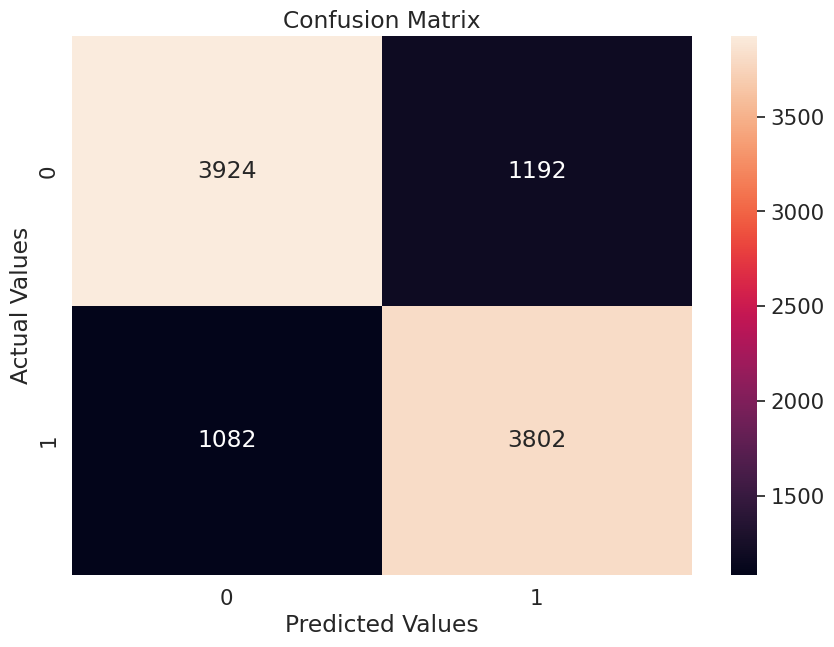

In [20]:
df_cm = pd.DataFrame(cm, index=(0, 1), columns=(0,1))
plt.figure(figsize=(10, 7))
sns.set(font_scale=1.4)
sns.heatmap(df_cm, annot=True, fmt='g')
plt.title('Confusion Matrix')
plt.ylabel('Actual Values')
plt.xlabel('Predicted Values')
plt.show()

In [21]:
from sklearn.model_selection import cross_val_score

In [23]:
accuracies = cross_val_score(estimator=classifier, X=X_train, y=y_train, cv=10)
print('Logistic accuracy: {:.2f} %'.format(accuracies.mean()*100))

Logistic accuracy: 76.72 %


In [26]:
# Formatting the Final Results
final_results = pd.concat([y_test, test_identifier], axis=1).dropna()
final_results['predicted_results'] = y_pred
final_results[['user', 'enrolled', 'predicted_results']].reset_index(drop=True)

,user,enrolled,predicted_results
0,48024,1,0
1,266463,1,0
2,262169,1,0
3,213736,1,0
4,169082,1,1
...,...,...,...
9995,367119,0,1
9996,4433,0,0
9997,146917,1,1
9998,77281,1,0
